# Initialize Model Inputs

In [1]:
# General
import pandas as pd
import numpy as np
import os

# umap
import umap

# sklearn
import sklearn
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Visualization
import plotly.express as px
import plotly.graph_objects as go

# Init variables
DATA_DIR = "~/Desktop/code/data/"
RANDOM_SEED = 42
TARGET = "media_id" 

In [2]:
# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]
df

ec                                             taxon_id media_id  1.1.1.1  \
0                                                 100.0     J346      0.0   
1                                                 100.0     J386      1.0   
2                                              100225.0     J233      0.0   
3                                             1002526.0      J22      0.0   
4                                             1004166.0       1a      1.0   
...                                                 ...      ...      ...   
8706  KBase_derived_Bin.033.fastaLS_S_extracted_bins...  unknown      1.0   
8707  KBase_derived_Bin.034.fastaCA_F_extracted_bins...  unknown      0.0   
8708  KBase_derived_Bin.037.fastaLS_S_extracted_bins...  unknown      0.0   
8709  KBase_derived_Bin.038.fastaLS_S_extracted_bins...  unknown      0.0   
8710  KBase_derived_Bin.039.fastaLS_S_extracted_bins...  unknown      0.0   

ec    1.1.1.100  1.1.1.101  1.1.1.102  1.1.1.103  1.1.1.105  1.1.1.107  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           0.0        0.0        0.0        0.0        0.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
8706        0.0        0.0        0.0        0.0        0.0        0.0   
8707        0.0        0.0        0.0        0.0        0.0        0.0   
8708        0.0        0.0        0.0        0.0        0.0        0.0   
8709        0.0        0.0        0.0        1.0        0.0        0.0   
8710        0.0        0.0        0.0        0.0        0.0        0.0   

ec    1.1.1.108  ...  7.6.2.12  7.6.2.13  7.6.2.14  7.6.2.15  7.6.2.16  \
0           0.0  ...       0.0       0.0       0.0       0.0       0.0   
1           0.0  ...       0.0       0.0       0.0       0.0       0.0   
2           0.0  ...       0.0       0.0       0.0       0.0       0.0   
3           0.0  ...       0.0       0.0       0.0       0.0       0.0   
4           0.0  ...       0.0       0.0       0.0       0.0       0.0   
...         ...  ...       ...       ...       ...       ...       ...   
8706        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8707        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8708        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8709        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8710        0.0  ...       0.0       0.0       0.0       0.0       0.0   

ec    7.6.2.2  7.6.2.5  7.6.2.7  7.6.2.8  7.6.2.9  
0         0.0      0.0      0.0      0.0      0.0  
1         0.0      0.0      0.0      0.0      0.0  
2         0.0      0.0      0.0      0.0      0.0  
3         0.0      0.0      0.0      0.0      0.0  
4         0.0      0.0      0.0      0.0      0.0  
...       ...      ...      ...      ...      ...  
8706      0.0      0.0      0.0      0.0      1.0  
8707      0.0      0.0      0.0      0.0      0.0  
8708      0.0      1.0      0.0      0.0      1.0  
8709      0.0      0.0      0.0      0.0      1.0  
8710      0.0      1.0      0.0      0.0      0.0  

[8711 rows x 3636 columns]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id"], axis=1),
    df_train[TARGET],
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Supervised Methods

## Random Forest

In [4]:
rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=RANDOM_SEED
)

rft = rfc.fit(X_train, y_train)

report = classification_report(
    y_true=y_test,
    y_pred=rft.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report)

              precision    recall  f1-score   support

       1031a       0.00      0.00      0.00         0
        104a       0.00      0.00      0.00         1
        104b       0.56      0.62      0.59         8
        104c       0.00      0.00      0.00         5
        104d       0.00      0.00      0.00         1
       1076b       0.67      0.67      0.67         6
       1081a       0.00      0.00      0.00         1
        110a       0.00      0.00      0.00         2
        115a       0.00      0.00      0.00         0
         11b       0.00      0.00      0.00         3
       1203a       0.54      0.30      0.39        23
        141c       0.00      0.00      0.00         1
        142a       1.00      1.00      1.00         1
        144b       0.00      0.00      0.00         1
        195c       0.00      0.00      0.00         1
          1a       0.25      0.32      0.28        28
        212a       1.00      1.00      1.00         1
        215b       0.50    

In [5]:
report_train = classification_report(
    y_true=y_train,
    y_pred=rft.predict(X_train),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_train)

              precision    recall  f1-score   support

       1012a       1.00      1.00      1.00         1
       1031a       0.25      0.14      0.18         7
        104a       0.00      0.00      0.00         2
        104b       0.53      0.61      0.57        31
        104c       0.67      0.25      0.36        16
       1058e       0.00      0.00      0.00         1
       1076b       0.96      1.00      0.98        25
       1081a       0.00      0.00      0.00         1
        110a       0.67      0.29      0.40         7
        115a       1.00      0.50      0.67         2
         11a       0.00      0.00      0.00         1
         11b       0.73      0.80      0.76        10
       1203a       0.80      0.66      0.72        79
        120a       0.31      1.00      0.47         4
        120c       0.00      0.00      0.00         1
        120d       1.00      0.50      0.67         2
       1266a       1.00      1.00      1.00         1
       1277a       0.00    

In [14]:
#import shap

#model = rfc.fit(X_train, y_train)
#explainer = shap.Explainer(model)
#shap_values = explainer(X_train)

#shap.plots.initjs()
#shap.plots.beeswarm(shap_values, max_display=11)
#shap.plots.bar(shap_values, max_display=40)

#NOTE: insufficient power (97 GiB to apply explainer to Random Forest model of this size)

## K-Neighbors

In [16]:
knc = KNeighborsClassifier(n_neighbors=20)
knt = knc.fit(X_train, y_train)

distances, indices = knt.kneighbors(X_test)

print(knt.predict(X_test))
indices

[ 8. 48.  1. ...  8.  0. 15.]


array([[ 176,  817,  940, ...,  474,  507,   71],
       [ 842,  714, 4517, ..., 3221, 4557, 5357],
       [ 354, 6648,  582, ..., 1179, 1640,   91],
       ...,
       [ 176,  817,  940, ...,  474,  507,   71],
       [5133, 2608, 3841, ..., 2507, 2431,  153],
       [ 223, 1011,  741, ...,  386,  766,  108]], dtype=int64)

In [18]:
report_test = classification_report(
    y_true=y_test,
    y_pred=knt.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_test)

              precision    recall  f1-score   support

         0.0       0.24      0.44      0.31        81
         1.0       0.38      0.71      0.49        21
         2.0       0.00      0.00      0.00         0
         3.0       0.35      0.28      0.31       102
         4.0       0.29      0.32      0.31        28
         5.0       0.00      0.00      0.00         4
         6.0       0.12      1.00      0.22         1
         8.0       0.26      0.53      0.35       141
         9.0       0.00      0.00      0.00         1
        10.0       0.60      0.19      0.29        16
        11.0       0.07      0.08      0.08        12
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2
        15.0       0.26      0.69      0.38        78
        16.0       0.32      0.29      0.30        49
        17.0       0.16      0.07      0.10        40
        18.0       0.25    

In [17]:
report_train = classification_report(
    y_true=y_train,
    y_pred=knt.predict(X_train),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_train)

              precision    recall  f1-score   support

         0.0       0.33      0.55      0.41       327
         1.0       0.37      0.58      0.45       107
         2.0       0.00      0.00      0.00         2
         3.0       0.41      0.45      0.43       392
         4.0       0.28      0.20      0.23       111
         5.0       0.00      0.00      0.00        19
         6.0       0.33      1.00      0.50         8
         7.0       0.00      0.00      0.00         1
         8.0       0.30      0.62      0.40       547
         9.0       0.60      0.21      0.32        14
        10.0       0.28      0.06      0.10        82
        11.0       0.25      0.17      0.21        40
        12.0       0.00      0.00      0.00        10
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         2
        15.0       0.26      0.71      0.38       283
        16.0       0.22      0.35      0.27       139
        17.0       0.23    

## XGBoost 

C:\Users\jakel\AppData\Local\Temp\ipykernel_15708\205839374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)


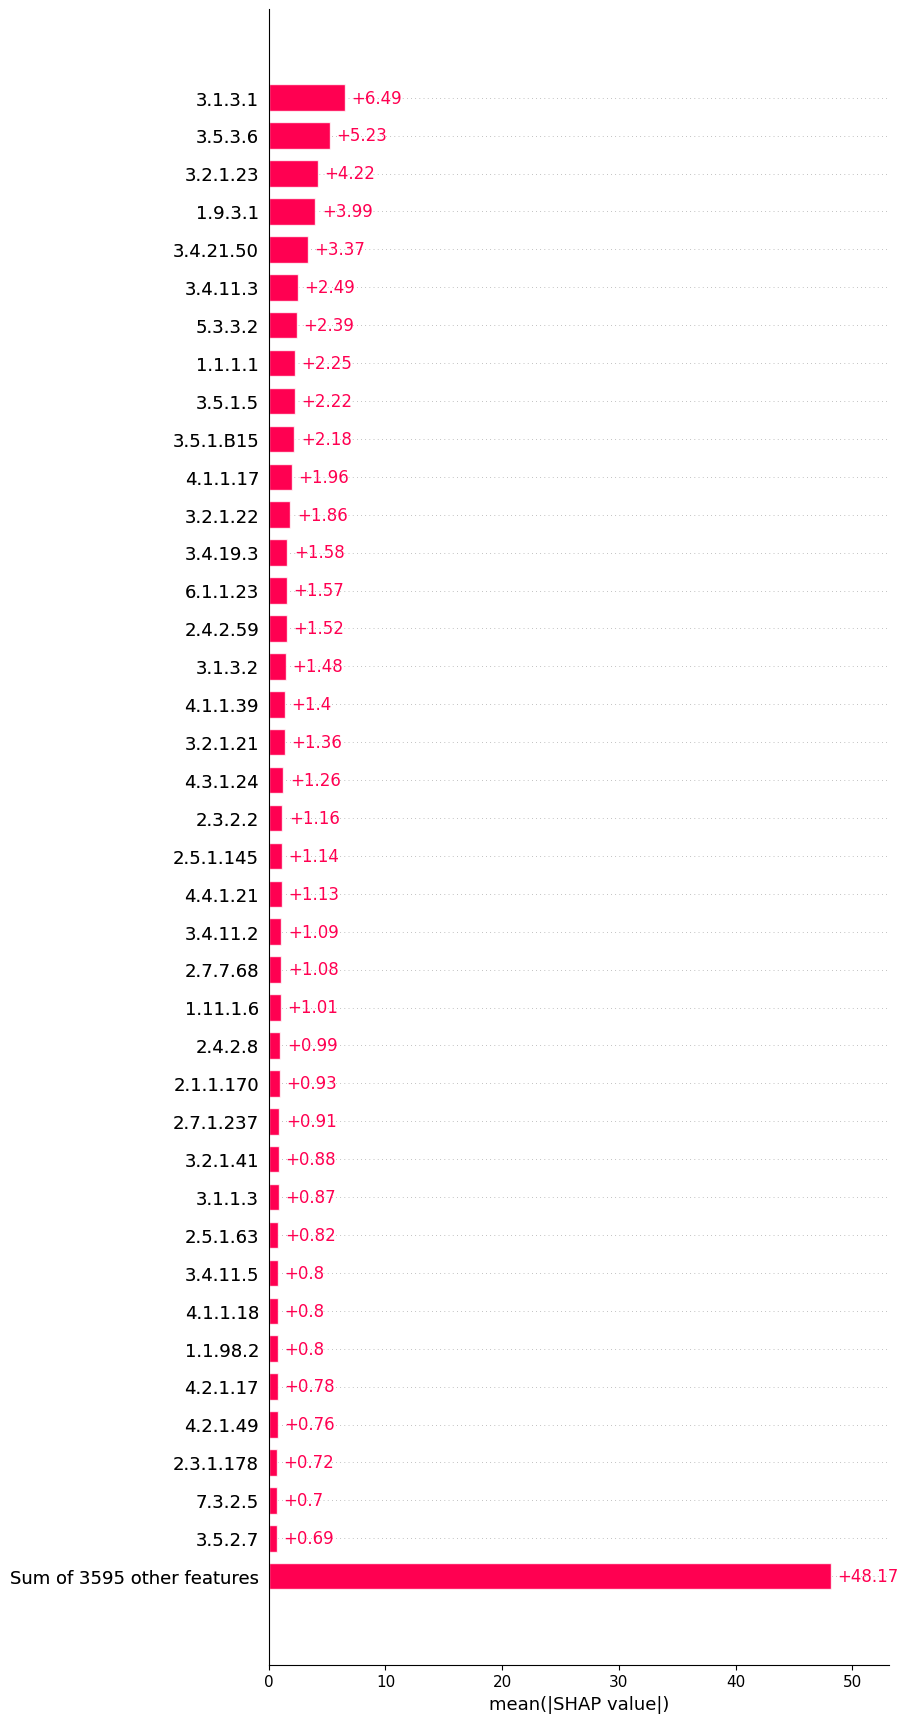

In [11]:
import xgboost
import shap

# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

model = xgboost.XGBRegressor().fit(X_train , y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.plots.initjs()
#shap.plots.beeswarm(shap_values, max_display=11)
shap.plots.bar(shap_values, max_display=40)

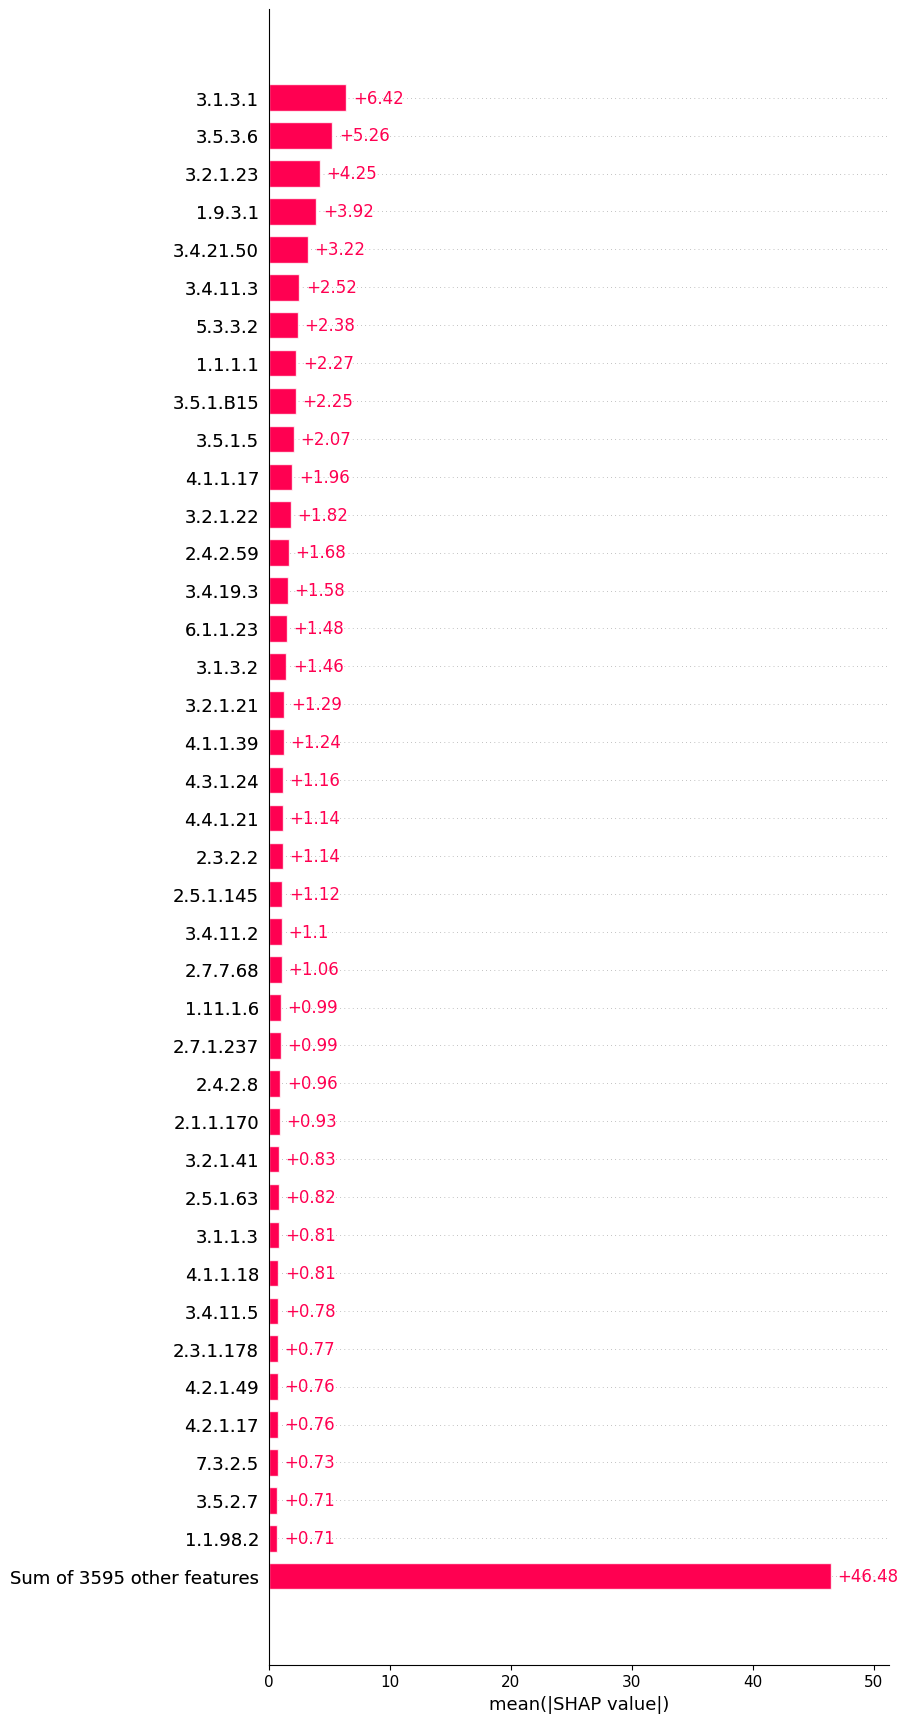

In [12]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=40)

# Unsupervised Methods

## PCA

In [66]:
pca = PCA(n_components=2, random_state= RANDOM_SEED)

X_train_transformed = pca.fit_transform(X_train) # fit pipeline and transform training data
X_test_transformed = pca.transform(X_test) # transform test data

explained_variance = pca.explained_variance_ratio_
print(f"Total PCA explained variance: {explained_variance.sum()}")

Total PCA explained variance: 0.5848448868881663


In [67]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

3 clusters returns a maximum Silhouette Coefficient of 0.9589926667049252


In [68]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

3 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8526420789036175


In [69]:
import plotly.express as px
fig = px.scatter_matrix(
    X_train_transformed,
    color=training_clusters,
    dimensions=range(2),
    #labels="taxon_id"
    )
fig.update_traces(diagonal_visible=False)
fig.show()

## UMAP

In [4]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

C:\Users\jakel\AppData\Local\Temp\ipykernel_20796\2910204531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)


### Euclidean

In [56]:
# Test a range of parameters for dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

#umap = umap.UMAP(  
#    metric="euclidean",
#    n_epochs=500,
#    random_state=RANDOM_SEED,
#    n_jobs=1,
#    n_components=2
#)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

#search.fit(X_train, y_train)
#best_params = search.best_params_
#best_model = search.best_estimator_

#print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [66]:
reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x00000280CACF5B20>
Traceback (most recent call last):
  File "c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


In [67]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

12 clusters returns a maximum Silhouette Coefficient of 0.8306539058685303


In [68]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8258286118507385


In [72]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6771 training points
1693 test points


In [84]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Hamming

In [59]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="hamming",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [5]:
import umap

reducer = umap.UMAP(             
    metric="hamming",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


In [6]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 50):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

16 clusters returns a maximum Silhouette Coefficient of 0.7757910490036011


In [7]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

16 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7445780038833618


In [8]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

# Create a reverse mapping from float back to media_id, remap to original values
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)

print(len(train_df), "training points")


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)

print(len(test_df), "test points")

6771 training points
1693 test points


In [9]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Jaccard

In [10]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="jaccard",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pynndescent\pynndescent_.py:962: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has r

Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [12]:
import umap

reducer = umap.UMAP(             
    metric="jaccard",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pynndescent\pynndescent_.py:962: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 5936 edges.
It has only fully disconnected 46 vertices.
Use umap.utils.disconnected_vertices() to identify them.



In [13]:
#TODO: DISCONNECT MEANS KMEANS CANNOT CLUSTER -- NO NAN!

In [23]:
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])
train_df = train_df.dropna()

test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])
test_df = test_df.dropna()

In [17]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 50):
    kmeans = KMeans(n_clusters=n_cluster).fit(train_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(train_df, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

3 clusters returns a maximum Silhouette Coefficient of 0.7786913514137268


In [26]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=20, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(train_df)
test_clusters = clusterer.predict(test_df)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(train_df, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

20 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7283972501754761


In [27]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df = train_df.dropna()
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df = test_df.dropna()
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6725 training points
1658 test points


In [28]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color ="KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

# Media Clustering

## Taxonomy as features

In [71]:
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

bins = df["source"].str.contains("KBase")
df = df[~bins]

df = df[["media_id", "taxon_id"]]
df = df.drop_duplicates()

df = df[["media_id", "taxon_id"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="taxon_id", values="count")
df = df.fillna(0.0).reset_index()

df.head()

taxon_id media_id  100.0  100225.0  1002526.0  1004166.0  1004261.0  \
0           1012a    0.0       0.0        0.0        0.0        0.0   
1           1031a    0.0       0.0        0.0        0.0        0.0   
2            104a    0.0       0.0        0.0        0.0        0.0   
3            104b    0.0       0.0        0.0        0.0        0.0   
4            104c    0.0       0.0        0.0        0.0        0.0   

taxon_id  1005039.0  1005740.0  1005926.0  1005928.0  ...  99480.0  99481.0  \
0               0.0        0.0        0.0        0.0  ...      0.0      0.0   
1               0.0        0.0        0.0        0.0  ...      0.0      0.0   
2               0.0        0.0        0.0        0.0  ...      0.0      0.0   
3               0.0        0.0        0.0        0.0  ...      0.0      0.0   
4               0.0        0.0        0.0        0.0  ...      0.0      0.0   

taxon_id  995054.0  99597.0  996.0  99653.0  99655.0  99675.0  99807.0  \
0              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
1              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
2              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
3              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
4              0.0      0.0    0.0      0.0      0.0      0.0      0.0   

taxon_id  999931.0  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 5956 columns]

In [72]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df['media_id'].unique())}
df['media_id_float'] = df['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["media_id", "media_id_float"], axis=1),
    df["media_id_float"],
    test_size=0.2,
    #stratify=, #for binary, balance train/test set
    random_state=RANDOM_SEED
)

In [76]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="euclidean",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

#search.fit(X_train, y_train)
#best_params = search.best_params_
#best_model = search.best_estimator_

#print("Best Parameters:", best_params) 

In [78]:
import umap

reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train, y_train) 
X_test_transformed = reducer.transform(X_test) 

In [34]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Window

3 clusters returns a maximum Silhouette Coefficient of 0.6654398441314697


In [79]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=10, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

10 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.39548632502555847


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [80]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

# Create a reverse mapping from float back to media_id, remap to original values
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)


print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)


print(len(test_df), "test points")

473 training points
119 test points


In [81]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["media_id"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["media_id"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500
)

fig.show()

## Components as features 

Binary input, grouped sub-solutions

In [82]:
# Load dataframe
media_df = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-media-comp.csv"), sep=";",low_memory=False)

media_df = media_df.drop("components", axis=1)
media_df["component_ids"] = media_df["component_ids"].str.strip('[]').str.split(", ")
media_df = media_df.explode("component_ids")

# Format for machine learning
df = media_df[["media_id", "component_ids"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="component_ids", values="count")
df = df.fillna(0.0).reset_index()
df = df.drop(["","4"], axis=1)

df

component_ids media_id    1   10  1000  1002  1005  101  1010  1015  1018  \
0                    1  1.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
1                   10  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
2                 1000  0.0  1.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
3                 1001  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
4                 1002  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
...                ...  ...  ...   ...   ...   ...  ...   ...   ...   ...   
3317                P5  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
3318                P6  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
3319                P7  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
3320                P8  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
3321                P9  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   

component_ids  ...  983  984  987  988  989   99  990  991  992  994  
0              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4              ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
3317           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3318           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3319           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3320           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3321           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3322 rows x 1206 columns]

In [88]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df['media_id'].unique())}
df['media_id_float'] = df['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["media_id", "media_id_float"], axis=1),
    df["media_id_float"],
    test_size=0.2,
    #stratify=, #for binary, balance train/test set
    random_state=RANDOM_SEED
)

In [96]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="euclidean",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [89]:
import umap

reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

In [123]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Win

4 clusters returns a maximum Silhouette Coefficient of 0.8562912940979004


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



In [90]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=20, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

20 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.5354217886924744


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



In [91]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)

print(len(train_df), "training points")


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)

print(len(test_df), "test points")

2657 training points
665 test points


In [92]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["media_id"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["media_id"]  # marker hover text
    )
)

fig.update_coloraxes(showscale=False) # hide color bar
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500
)

fig.show()

In [95]:
print(len(train_df), "training points")
print(len(test_df), "test points")
print(len(train_df)+len(test_df), "total")

2657 training points
665 test points
3322 total


In [100]:
train_media = train_df[["KMeans Cluster", "media_id"]]
test_media = test_df[["KMeans Cluster", "media_id"]]
frames = train_media, test_media
media_clusters = pd.concat(frames)

print(len(media_clusters), "total")
media_clusters.head()

3322 total


KMeans Cluster media_id
0               7    J1218
1              17      644
2              18     1393
3              13     J963
4              18     756a

Note: MAJOR differences in clustering seen just by removing ingredient 4 (DI H2O)

TODO: liquid v solid media? pH, temp, O2, salinity? other "universal" ingredients (agar, etc.)?

# Pipeline (EC:1,3)

Reduce and cluster

In [ ]:
# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
EC1 = df["ec"].str.startswith("1.")
EC3 = df["ec"].str.startswith("3.")
df = df[EC1 | EC3]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]

# Split the datasets into training and test sets
TARGET = "media_id" # target label
RANDOM_SEED = 47 #47 = seed for random_state reported in thesis

# Test case with MAGs
X_train = df_train.drop(["taxon_id", "media_id"], axis=1)
y_train = df_train[TARGET] 
X_test = df_test.drop(["taxon_id", "media_id"], axis=1)
y_test = df_test[TARGET]

# sklearn pipeline helps prevent data leakage; incorporate individual steps here
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(
        n_components=150,      
        random_state= RANDOM_SEED
        )),    
    ('umap', umap.UMAP(      
        metric="euclidean",
        n_epochs=500,
        random_state=RANDOM_SEED,
        n_jobs=1,
        n_components=40, 
        n_neighbors=62, 
        min_dist=0 
        )) 
])

# Fit and transform the pipeline on the training and test data
X_train_transformed = pipeline.fit_transform(X_train) # fit pipeline and transform training data
X_test_transformed = pipeline.transform(X_test) # transform test data

# Cluster
clusterer = KMeans(n_clusters=182, random_state=RANDOM_SEED)
cluster_labels = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Initial dimensionality reduction performance (PCA)
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

# UMAP and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, cluster_labels)

print(f"Total PCA explained variance: {explained_variance.sum()}")
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

Classification

In [ ]:
y2_train = cluster_labels
y2_test = test_clusters

rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=RANDOM_SEED
)

rfc.fit(X_train_transformed, y2_train)

report = classification_report(
    y_true=y2_test,
    y_pred=rfc.predict(X_test_transformed),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

roc_score = metrics.roc_auc_score(
    y_true=y2_test,
    y_score=rfc.predict_proba(X_test_transformed),
    labels=np.unique(y2_train),
    average="weighted",
    multi_class="ovo"
)

print(report)
print("RF ROC AUC score:", roc_score)


knc= KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train_transformed, cluster_labels)
distances, indices = knc.kneighbors(X_test_transformed)

report = classification_report(
    y_true=y2_test,
    y_pred=knc.predict(X_test_transformed),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

roc_score = metrics.roc_auc_score(
    y_true=y2_test,
    y_score=knc.predict_proba(X_test_transformed),
    labels=np.unique(y2_train),
    average="weighted",
    multi_class="ovo"
)

print(report)
print("KNN ROC AUC score:", roc_score)

Outputs

In [ ]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])
train_df['Set'] = 'Training'
train_df['Target'] = y_train
train_df['KMeans Cluster'] = cluster_labels
train_df['taxon_id'] = df_train["taxon_id"]

# Media cluster labels
media_clusters = pd.read_csv(os.path.join(DATA_DIR, "model", "media-clusters.csv"))
media_clusters = media_clusters[["media_id", "Cluster"]]
media_clusters = media_clusters.rename(columns={"media_id": "Target", "Cluster": "Media Cluster"})
target_label_mapping = dict(zip(media_clusters['Target'], media_clusters['Media Cluster']))
train_df['Media Cluster'] = train_df['Target'].map(target_label_mapping)

#train_df.to_csv(os.path.join(DATA_DIR, "model", "train-output.csv"), index=False)


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])
test_df['Set'] = 'Test'
test_df['Target'] = list(df_test['media_id'])
test_df['KMeans Cluster'] = test_clusters
test_df['taxon_id'] = list(df_test['taxon_id'])

# Add classifier labels 
test_df["KNN Classify"] = knc.predict(X_test_transformed)
test_df["RF Classify"] = rfc.predict(X_test_transformed)

#test_df.to_csv(os.path.join(DATA_DIR, "model", "test-output.csv"), index=False)


# Add nearest neighbor indices to the test dataframe
knn_df = test_df.copy()
knn_df = knn_df.rename(columns={"KMeans Cluster": "Test Cluster"})
neighbors = pd.DataFrame(indices) # Indices of nearest neighbors from the training set
knn_df['indices'] = neighbors[neighbors.columns[0:]].apply(lambda x: ';'.join(x.dropna().astype(str)), axis=1)
knn_df["indices"] = knn_df["indices"].str.split(';')
knn_df = knn_df.explode("indices")

# Add original indices as a column for the train dataframe
train_index = train_df.copy()
train_index = train_index.rename(columns={"KMeans Cluster": "Train Cluster"})
train_index["indices"] = df_train.index
train_index["indices"] = train_index["indices"].astype(str)

# Merge to label nearest neighbors
left = knn_df.copy()
right = train_index[["indices", "Target", "taxon_id", "Media Cluster"]]
right = right.rename(columns={"Target": "neighbor_media_id", "taxon_id": "neighbor_taxon_id", "Cluster": "neighbor_cluster"})
merged = pd.merge(left, right, on="indices", how="left")

#merged.to_csv(os.path.join(DATA_DIR, "model", "ml-model-output.csv"), index=False)
merged.head()

Feature Importance

In [ ]:
import xgboost
import shap

XG_train = X_train_transformed
yG_train = cluster_labels
XG_test = X_test_transformed
yG_test = test_clusters

model = xgboost.XGBRegressor().fit(XG_train, yG_train)

explainer = shap.Explainer(model)
shap_values = explainer(XG_test) #XG_test

shap.plots.initjs()

#shap.plots.beeswarm(shap_values) #, max_display=40
#shap.plots.waterfall(shap_values[0])
#shap.plots.force(shap_values[:500])
#shap_values = explainer(XG_train) #XG_test
#shap.plots.beeswarm(shap_values) #, max_display=40
#shap.plots.bar(shap_values.abs.max(0))
shap.plots.bar(shap_values)

Model Visualization

In [ ]:
# Highest-importance features (set var to easily change vis)
dim1 = "Component 8" # 31 38
dim2 = "Component 3" # 13 33

# Plot the training points
fig = px.scatter(
    data_frame = train_df,
    x = dim1,
    y = dim2, 
    color = "KMeans Cluster",
    hover_data = ["taxon_id", "Target", "Media Cluster"],
    opacity = 0.3
) 

# Add the test points as a scatter trace
fig.add_trace(
    go.Scatter(
        x=test_df[dim1],  # x coordinates
        y=test_df[dim2],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0 
        ),
        text=test_df["taxon_id"]  # marker hover text
    )
)

# Opacity slider
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the first trace only
        label=str(i/20)
    )
    steps.append(step)
sliders = [dict(
    active=3,  # initial value corresponding to opacity=0.3
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    sliders=sliders,
    title="Fenix21 (Global Structure)", # Local => limit axis ranges
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500 #auotfit?
)

#fig.update_yaxes(range=[2.25, 4.25])
#fig.update_xaxes(range=[2, 8])

fig.show()

Prediction

In [ ]:
predictor = merged.copy()
predictor = predictor.drop(predictor.iloc[:,0:42], axis=1)
predictor = predictor.drop('indices', axis=1)

#predictor.to_csv("~/Desktop/n_neighbors-20.csv", index=False) # save under different names for further analysis with each seed

df = predictor[["taxon_id", "Test Cluster", "KNN Classify", "RF Classify", "neighbor_taxon_id", "neighbor_media_id", "Media Cluster"]]
df = df.rename(columns={
    "Test Cluster": "KM",
    "KNN Classify": "KN", 
    "RF Classify": "RF",
    "neighbor_media_id": "KN Neighbor Media",
    "neighbor_taxon_id": "KN Neighbor ID"
})

df.head()

# Comparison Test

In [134]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go

import umap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [136]:
# Init variables
DATA_DIR = "~/Desktop/code/data/"
RANDOM_SEED = 42
TARGET = "media_id" 

# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]

# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    #stratify=df_train["media_id_float"], #need at least two members per class, => need media clusters here?
    random_state=RANDOM_SEED
)

C:\Users\jakel\AppData\Local\Temp\ipykernel_15708\3256806740.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Supervised

https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

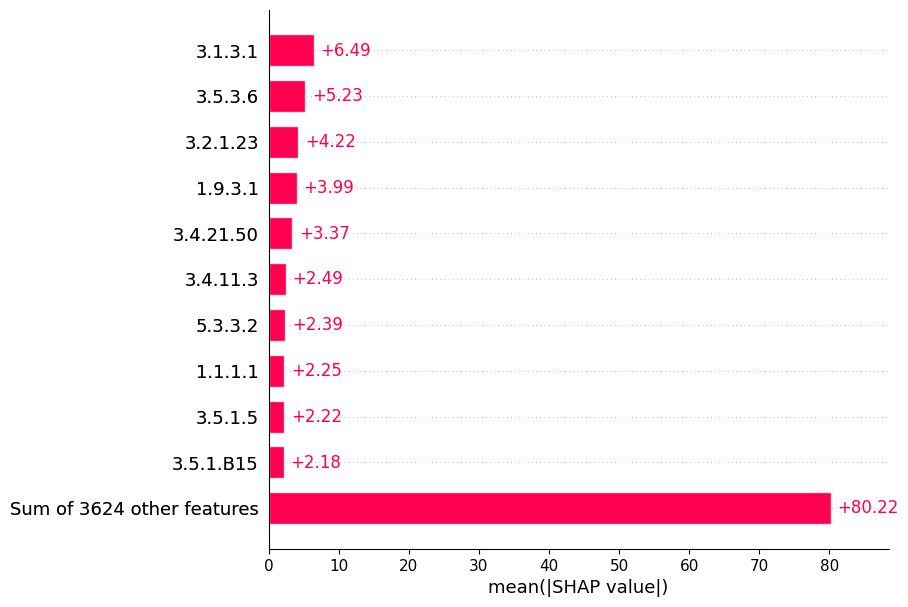

In [54]:
# XGBoost Gradient Boosting (boosted decision trees)

import xgboost
import shap

model = xgboost.XGBRegressor().fit(X_train , y_train) # XGBoost Random Forest Regressor
explainer = shap.Explainer(model)

shap_values = explainer(X_train) # TOGGLE

shap.plots.initjs()
shap.plots.bar(shap_values, max_display=11)

In [57]:
# XGBoost Random Forest

xgb_model = xgboost.XGBRFRegressor(random_state=42).fit(X_train, y_train)

report_train = classification_report(
    y_true = y_train,
    y_pred = xgb_model.predict(X_train).round(),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

#print(report_train)

report_test = classification_report(
    y_true=y_test,
    y_pred=xgb_model.predict(X_test).round(),
    zero_division=0.0
)

#print(report_test)

## Unsupervised

Model and metrics

In [ ]:
from sklearn.svm import SVC

# First check directly against the model
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

svc.score(X_test, y_test), knn.score(X_test, y_test) # 0.225, 0.263

In [139]:
reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=12, random_state=RANDOM_SEED)

training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)

print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8258286118507385


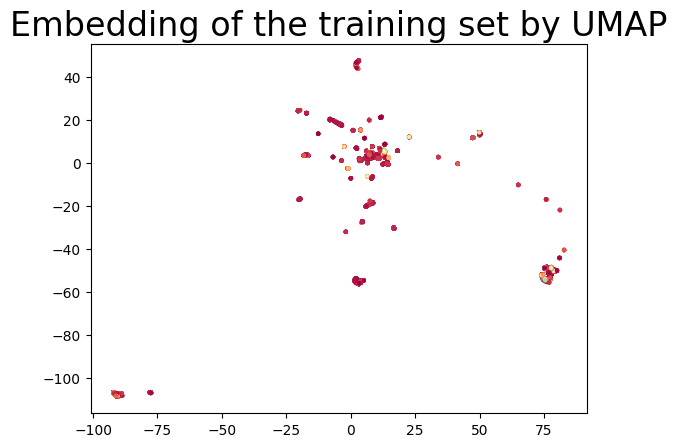

In [142]:
# Visualize the dataset's embedding

plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

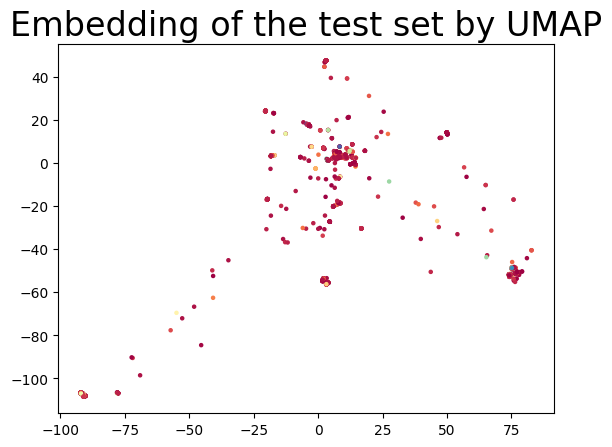

In [145]:
# Now visualize the dataset following the transform

svc = SVC().fit(reducer.embedding_, y_train)
knn = KNeighborsClassifier().fit(reducer.embedding_, y_train)

test_embedding = reducer.transform(X_test)

plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

In [146]:
svc.score(reducer.transform(X_test), y_test), knn.score(reducer.transform(X_test), y_test)

(0.15475487300649735, 0.20614294152392204)

Outputs and visualization

In [107]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

# Reverse mapping of media labels
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = df_train['media_id_float'].map(reverse_media_id_mapping)
test_df['media_id'] = df_train['media_id_float'].map(reverse_media_id_mapping)

2657 training points
665 test points


In [108]:
# Retrieve media_clusters from the "Media Clustering" Components as features section
media_clusters = media_clusters.copy()
media_clusters = media_clusters.rename(columns={"KMeans Cluster": "Media Cluster"})

# Merge dataframes with media_cluster info
df1 = pd.merge(left=train_df, right=media_clusters, on="media_id", how="left")
df2 = pd.merge(left=test_df, right=media_clusters, on="media_id", how="left")

In [126]:
training_dataframe = df1 # train_df | df1
test_dataframe = df2 # test_df | df2

fig = px.scatter(
    data_frame = training_dataframe,
    x = "Component 1",
    y = "Component 2", 
    color = "Media Cluster",
    hover_data = ["media_id", "KMeans Cluster"],
    opacity = 0.8
) 

fig.add_trace(
    go.Scatter(
        x=test_dataframe["Component 1"],  # x coordinates
        y=test_dataframe["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.5 
        ),
        text=test_dataframe["media_id"]  # marker hover text
    )
)

fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500
)

fig.show()